## Unmasking biomacromolecular conformational dynamics from 2D analysis of subdomains vibration modes and molecular kinetics (Tutorial 2)

### From raw images

In [1]:
from PIL import Image
import numpy as np

def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)
frames = read_tiff('spikes\SV 12.tif')
print(frames.shape)
X = frames.reshape(frames.shape[0],frames.shape[1]*frames.shape[1]).T

(170, 134, 134)


c:\Users\ianad\anaconda3\envs\bempp\lib\site-packages\pydmd\bopdmd.py:812: UserWarning: Initial trial of Optimized DMD failed to converge. Consider re-adjusting your variable projection parameters with the varpro_opts_dict and consider setting verbose=True.
  warnings.warn(msg)


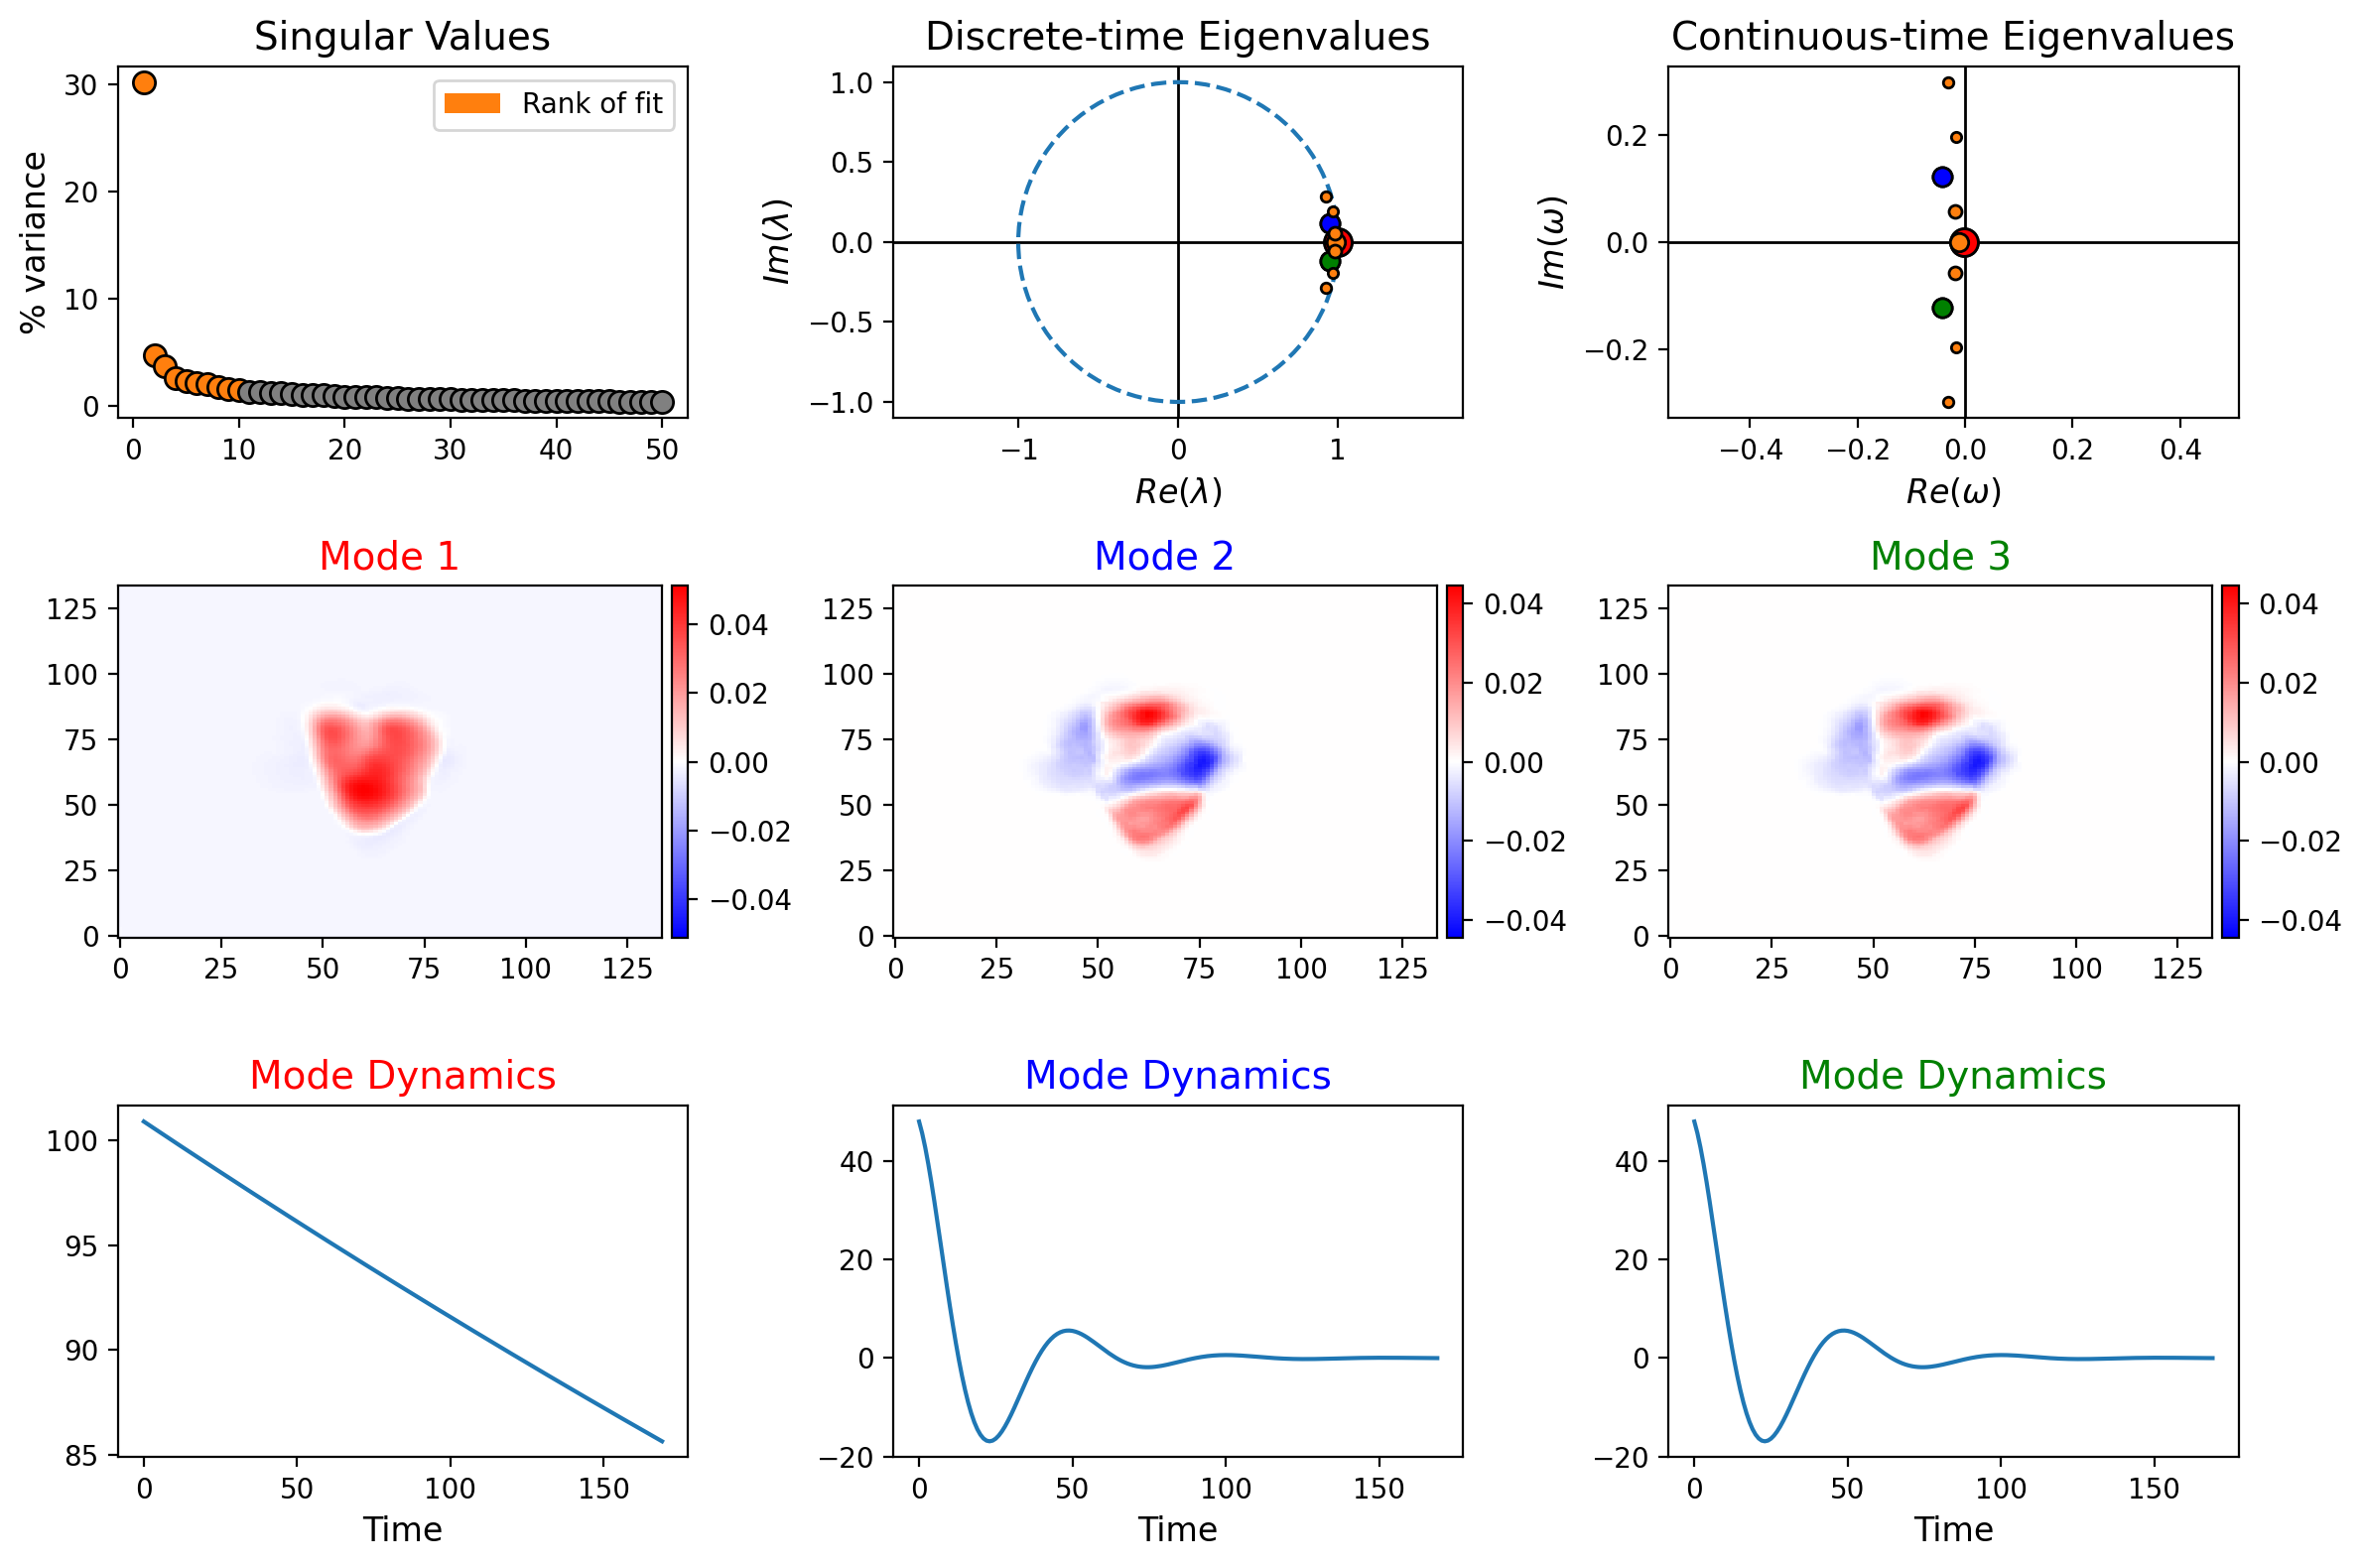

In [2]:
from pydmd import DMD, BOPDMD, EDMD
from pydmd.plotter import plot_eigs, plot_summary
%matplotlib inline

optdmd = BOPDMD(svd_rank=10)#, varpro_opts_dict={"verbose": True, "tol": 0.04}) #uncomment to add options
#dmd = DMD(svd_rank=4)
optdmd.fit(X,np.linspace(0,frames.shape[0]-1,frames.shape[0]))

# Plot a summary of the DMD results.
plot_summary(optdmd,snapshots_shape=(frames.shape[1],frames.shape[1]))

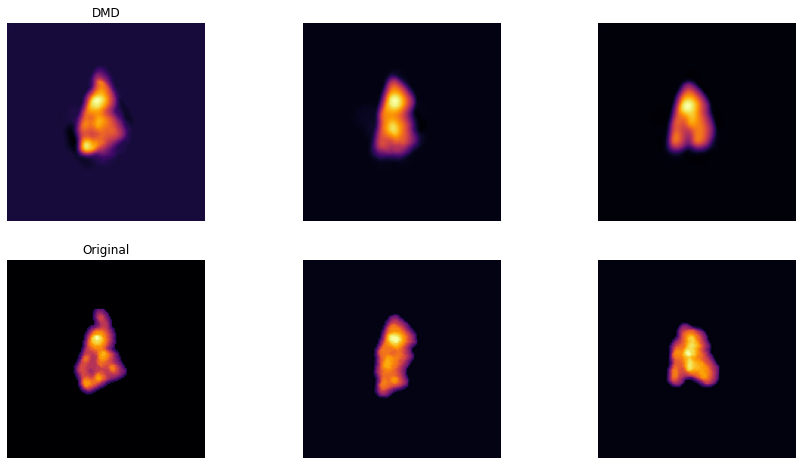

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3,figsize=(15,8))
axs[0,0].imshow(np.real(optdmd.reconstructed_data[:,0]).reshape(frames.shape[1],frames.shape[1]),cmap='inferno')
axs[0,1].imshow(np.real(optdmd.reconstructed_data[:,frames.shape[0]//3]).reshape(frames.shape[1],frames.shape[1]),cmap='inferno')
axs[0,2].imshow(np.real(optdmd.reconstructed_data[:,frames.shape[0]-1]).reshape(frames.shape[1],frames.shape[1]),cmap='inferno')
axs[1,0].imshow(np.real(X[:,0]).reshape(frames.shape[1],frames.shape[1]),cmap='inferno')
axs[1,1].imshow(np.real(X[:,frames.shape[0]//3]).reshape(frames.shape[1],frames.shape[1]),cmap='inferno')
axs[1,2].imshow(np.real(X[:,frames.shape[0]-1]).reshape(frames.shape[1],frames.shape[1]),cmap='inferno')
axs[0,0].set_title(f'DMD'); axs[1,0].set_title(f'Original');
axs[0,0].set_axis_off(); axs[0,1].set_axis_off();  axs[0,2].set_axis_off(); 
axs[1,0].set_axis_off(); axs[1,1].set_axis_off();  axs[1,2].set_axis_off(); 

#### Animation (TODO)

### From txt file

In [81]:
coords_raw = np.loadtxt('spikes\SV 12.txt')
coords = coords_raw.copy()
coords[:,[2,3]] = coords[:,[3, 2]]

In [82]:
coords.shape

(297381, 4)